In [120]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt 

# seaboarn lib add
import seaborn as sns

import time

%matplotlib inline


import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


print('numpy version  - ' , np.__version__)
print('pandas version - ' , pd.__version__)

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
    print('d')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('w')
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# ml lib
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold , cross_val_score , cross_validate , GridSearchCV
from   sklearn.tree            import DecisionTreeClassifier
from   sklearn.metrics         import accuracy_score

from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , StandardScaler , MinMaxScaler
from   sklearn.impute          import SimpleImputer
import missingno as msno 

import graphviz

sklearn.__version__

numpy version  -  1.20.1
pandas version -  1.2.4
w


'0.24.1'

####  교차검증과 하이퍼파라미터를 이용한 최적의 모델을 만드는 방법

- GridSearchCV 를 이용한 파라미터 튜닝

##### DecisionTree 에서 사용할 수 있는 파라미터

- criterion : 분할 품질을 측정하는 기능 (default : gini)
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- max_depth : 트리의 최대 깊이 (값이 클수록 모델의 복잡도가 올라간다.)
- min_samples_split : 자식 노드를 분할하는데 필요한 최소 샘플 수 (default : 2)
- min_samples_leaf : 리프 노드에 있어야 할 최소 샘플 수 (default : 1)
- min_weight_fraction_leaf : min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
- max_features : 각 노드에서 분할에 사용할 특징의 최대 수
- random_state : 난수 seed 설정
- max_leaf_nodes : 리프 노드의 최대수
- min_impurity_decrease : 최소 불순도
- min_impurity_split : 나무 성장을 멈추기 위한 임계치
- class_weight : 클래스 가중치
- presort : 데이터 정렬 필요 여부

In [33]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data  , 
                                                    iris.target ,
                                                    test_size = 0.2 , 
                                                    random_state = 200 ) 

dtc = DecisionTreeClassifier(random_state = 100, criterion = 'entropy') 
dtc.fit(X_train , y_train)


DecisionTreeClassifier(criterion='entropy', random_state=100)

In [34]:
from sklearn.tree import export_graphviz

export_graphviz(dtc , 
                out_file     = 'iris_tree.dot' , 
                class_names   = iris.target_names , 
                feature_names = iris.feature_names , 
                impurity = True  , 
                filled   = True)


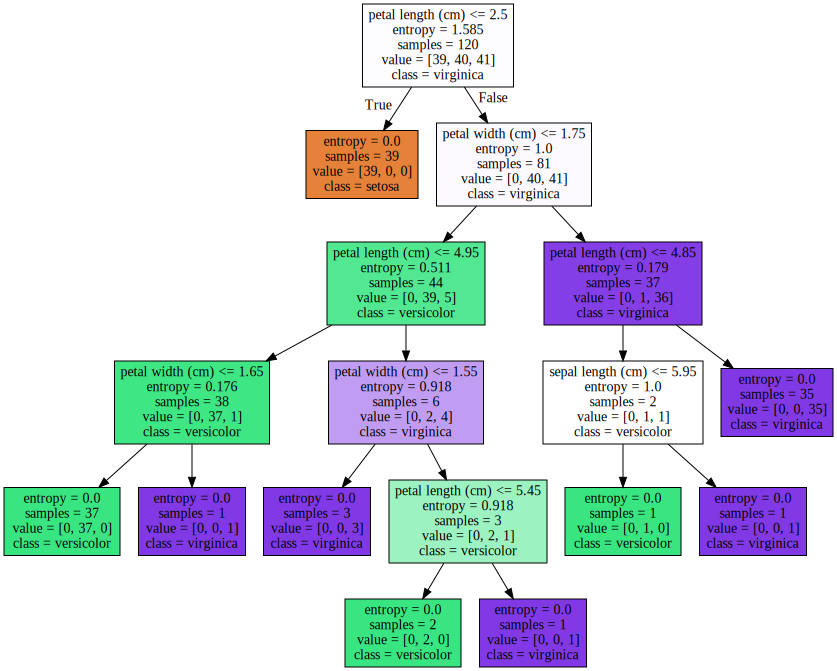

In [35]:
import os

os.environ['PATH'] += os.pathsep+'C:/Program Files (x86)/Graphviz2.38/bin/'

with open('./iris_tree.dot') as file :
    dot_graph = file.read()

graphviz.Source(dot_graph)    


In [69]:
print('불순도(Impurity)  - 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지 - ')
print('엔트로피(Entropy) - 불순도(Impurity)를 수치적으로 나타낸 척도로 엔트로피가 1 이면 불순도가 최대 - ')
print('결정트리는 불순도를 최소화하는게 목표 - ')
print()
gscv_dtc = DecisionTreeClassifier() 

param = {
    'criterion' : ['gini' , 'entropy'] , 
    'splitter'  : ['best' , 'random'] , 
    'max_depth' : [1,2,3] , 
    'min_samples_split' : [2,3]
}


불순도(Impurity)  - 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지 - 
엔트로피(Entropy) - 불순도(Impurity)를 수치적으로 나타낸 척도로 엔트로피가 1 이면 불순도가 최대 - 
결정트리는 불순도를 최소화하는게 목표 - 



In [37]:
print('refit = True : 최적의 하이퍼 파라미터를 찾아서 재학습을 하겠다는 의미')
grid_gscv_tree = GridSearchCV(gscv_dtc , 
                              param_grid = param , 
                              cv = 3 , 
                              refit = True) 

refit = True : 최적의 하이퍼 파라미터를 찾아서 재학습을 하겠다는 의미


In [38]:
grid_gscv_tree.fit(X_train , y_train)
grid_gscv_tree.cv_results_

{'mean_fit_time': array([0.00066702, 0.00066733, 0.00033299, 0.00066678, 0.00099977,
        0.0006663 , 0.00100025, 0.        , 0.        , 0.00066686,
        0.00100064, 0.00033323, 0.        , 0.00099802, 0.00099969,
        0.        , 0.        , 0.        , 0.        , 0.00067163,
        0.00099977, 0.00100001, 0.00033379, 0.0010004 ]),
 'std_fit_time': array([4.71652146e-04, 4.71878375e-04, 4.70920787e-04, 4.71482786e-04,
        1.14065012e-06, 4.71150437e-04, 1.32507737e-06, 0.00000000e+00,
        0.00000000e+00, 4.71538951e-04, 7.78671819e-07, 4.71257962e-04,
        0.00000000e+00, 3.05944706e-06, 5.15042996e-07, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.49821378e-04,
        2.24783192e-07, 4.49566384e-07, 4.72044703e-04, 7.01885292e-07]),
 'mean_score_time': array([0.00033323, 0.        , 0.        , 0.00066717, 0.00100255,
        0.00033371, 0.        , 0.00066606, 0.        , 0.        ,
        0.        , 0.00066892, 0.00066876, 0.  

In [39]:
score_frm = pd.DataFrame(grid_gscv_tree.cv_results_)
score_frm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000667,4.716521e-04,0.000333,4.712580e-04,gini,1,2,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.650,0.650,0.650,0.650000,0.000000e+00,17
1,0.000667,4.718784e-04,0.000000,0.000000e+00,gini,1,2,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.575,0.650,0.650,0.625000,3.535534e-02,23
2,0.000333,4.709208e-04,0.000000,0.000000e+00,gini,1,3,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.650,0.650,0.650,0.650000,0.000000e+00,17
3,0.000667,4.714828e-04,0.000667,4.717638e-04,gini,1,3,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.650,0.675,0.625,0.650000,2.041241e-02,17
4,0.001000,1.140650e-06,0.001003,3.698691e-06,gini,2,2,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.875,0.950,0.900,0.908333,3.118048e-02,7
5,0.000666,4.711504e-04,0.000334,4.719323e-04,gini,2,2,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.650,0.825,0.775,0.750000,7.359801e-02,16
6,0.001000,1.325077e-06,0.000000,0.000000e+00,gini,2,3,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.875,0.950,0.900,0.908333,3.118048e-02,7
7,0.000000,0.000000e+00,0.000666,4.709771e-04,gini,2,3,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.700,0.900,0.825,0.808333,8.249579e-02,13
8,0.000000,0.000000e+00,0.000000,0.000000e+00,gini,3,2,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.950,0.950,0.950,0.950000,1.110223e-16,1
9,0.000667,4.715390e-04,0.000000,0.000000e+00,gini,3,2,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.925,1.000,0.900,0.941667,4.249183e-02,6


In [40]:
score_frm[['params' , 'rank_test_score']]

,params,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",17
1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",23
2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",17
3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",17
4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",7
5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",16
6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",7
7,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",13
8,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",1
9,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",6


In [41]:
print('최적의 파라미터 확인 - ')
print()
print(grid_gscv_tree.best_params_)
print()
print('높은 정확도 - ')
print()
print(grid_gscv_tree.best_score_)


최적의 파라미터 확인 - 

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'best'}

높은 정확도 - 

0.9499999999999998


In [42]:
estimator = grid_gscv_tree.best_estimator_
y_predict = estimator.predict(X_test)
print('answer - \n' , y_test)
print()
print('guess - \n'  , y_predict)
print()
print('테스트 정확도 - ' , accuracy_score(y_test , y_predict))

answer - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 2 0 0 0 1 2 2 1]

guess - 
 [1 2 0 0 1 2 1 1 1 2 2 0 0 0 2 0 1 0 1 2 0 1 1 0 0 0 1 2 2 1]

테스트 정확도 -  0.9666666666666667


feature importance -  [0.        0.        0.6008535 0.3991465]
트리 분류 모델 형성에 각 특성이 얼마나 잘 작용했는지를 평가하는 지표
해당 지표는 0~1사이의 값을 가지며 , 0이면 특성이 전혀 작용하지 않았음을 의미하고 1은 완전하게 작용하였음을 의미
특성 중요도 전체의 합은 1 이다

sepal length (cm) 	 0.0
sepal width (cm) 	 0.0
petal length (cm) 	 0.6008535033788335
petal width (cm) 	 0.39914649662116647
feature importance를 피처별로 시각화 하기



<AxesSubplot:>

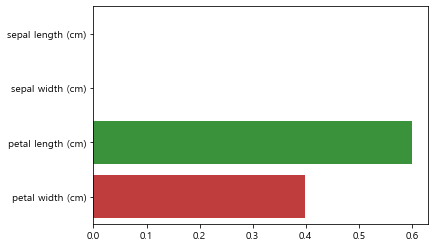

In [68]:
print('feature importance - ' , estimator.feature_importances_)
print('트리 분류 모델 형성에 각 특성이 얼마나 잘 작용했는지를 평가하는 지표')
print('해당 지표는 0~1사이의 값을 가지며 , 0이면 특성이 전혀 작용하지 않았음을 의미하고 1은 완전하게 작용하였음을 의미')
print('특성 중요도 전체의 합은 1 이다')
print()

for name, value in zip(iris.feature_names , estimator.feature_importances_) :
    print(name, '\t',value)

print('feature importance를 피처별로 시각화 하기')
print()
sns.barplot(x = estimator.feature_importances_ , y = iris.feature_names)

#### breast_cancer 데이터를 이용한 GridSerachCV [실습] - 

In [66]:
cancer = load_breast_cancer()
print('type - ' , type(cancer))
print('keys - ' , cancer.keys())

type -  <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [53]:
cancer_frm = pd.DataFrame(data    = cancer.data , 
                          columns = cancer.feature_names)
cancer_frm['target'] = cancer.target
cancer_frm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [54]:
print('DecisionTree Estimator를 이용해서 - ')
print('train test : 7,3 - ')
print('학습 , 예측 - ')
print('학습결과를 평가 - ')
print('graphviz 시각화 - ')


DecisionTree Estimator를 이용해서 - 
train test : 7,3 - 
학습 , 예측 - 
학습결과를 평가 - 
graphviz 시각화 - 


In [55]:
print('교차 검증 - ')

교차 검증 - 


In [56]:
print('GridSearchCV 를 이용한 하이퍼 파라미터 튜닝을 진행 - ')

GridSearchCV 를 이용한 하이퍼 파라미터 튜닝을 진행 - 


In [67]:
print('피처의 중요도를 시각화 - ')

피처의 중요도를 시각화 - 


#### 데이터 전처리

- 데이터 인코딩(ML 에서는 문자열 값을 입력값으로 허용하지 않는다) -> 숫자형 변환
- 방법) 레이블 인코딩 , 원-핫-인코딩 
- 주의사항) 회귀알고리즘에서는 적용 X , 트리계열의 알고리즘에서는 적용 O
- 트리계열의 알고리즘 중에서 성능이 떨어지는 단점이 있을 수 있다. 왜냐하면 - 숫자의 특성이 반영되기 때문에

- 입력값으로 결측값을 허용하지 않는다 -> 고정된 다른 값으로 변환

- 피처 스케일링 -> 정규화(0과 1사이의 값으로 변환 - MinMaxScalar) , 표준화(정규분포를 따르는 형식으로 평균이 0 분산 1 가우시안분포 변환 - StandardScalar)

- LabelEncoder : fit() , transform()
- 문자열 피처를 숫자형 변환

In [76]:
label_items = ['낫또' , '집밥' , 'ABC 쥬스' , '제육복음' , '낫또']
encoder = LabelEncoder()
labels  = encoder.fit(label_items).transform(label_items)
print('labels - ' , labels)
print('인코딩 클래스 - '  , encoder.classes_)
print('디코딩 원본 값 - ' , encoder.inverse_transform(labels))

labels -  [1 3 0 2 1]
인코딩 클래스 -  ['ABC 쥬스' '낫또' '제육복음' '집밥']
디코딩 원본 값 -  ['낫또' '집밥' 'ABC 쥬스' '제육복음' '낫또']


- One-Hot Encoding

In [85]:
label_items = ['낫또' , '집밥' , 'ABC 쥬스' , '제육복음' , '낫또']
encoder = LabelEncoder()
digit_labels  = encoder.fit(label_items).transform(label_items)

print('type - ' , type(digit_labels))
print()

print('2차원 데이터 변환') 
digit_labels = digit_labels.reshape(-1, 1)
print('shape - ' , digit_labels.shape)
print()
print(digit_labels)

print('One-Hot Encoding - ')
one_hot_encoder = OneHotEncoder()
one_hot_encoder_labels = one_hot_encoder.fit(digit_labels).transform(digit_labels)
print('shape - ' , one_hot_encoder_labels.shape)
print()
print(one_hot_encoder_labels.toarray())


type -  <class 'numpy.ndarray'>

2차원 데이터 변환
shape -  (5, 1)

[[1]
 [3]
 [0]
 [2]
 [1]]
One-Hot Encoding - 
shape -  (5, 4)

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [86]:
encoder_frm  = pd.DataFrame({
    'label_items' : ['낫또' , '집밥' , 'ABC 쥬스' , '제육복음' , '낫또']
})

pd.get_dummies(encoder_frm)

,label_items_ABC 쥬스,label_items_낫또,label_items_제육복음,label_items_집밥
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


- 결측값 처리
- 결측값을 시각화 시켜주는 패키지 : conda install -c conda-forge/label/cf202003 missingno
- 

In [88]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")
df = pd.read_csv(csv_data)
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


<AxesSubplot:>

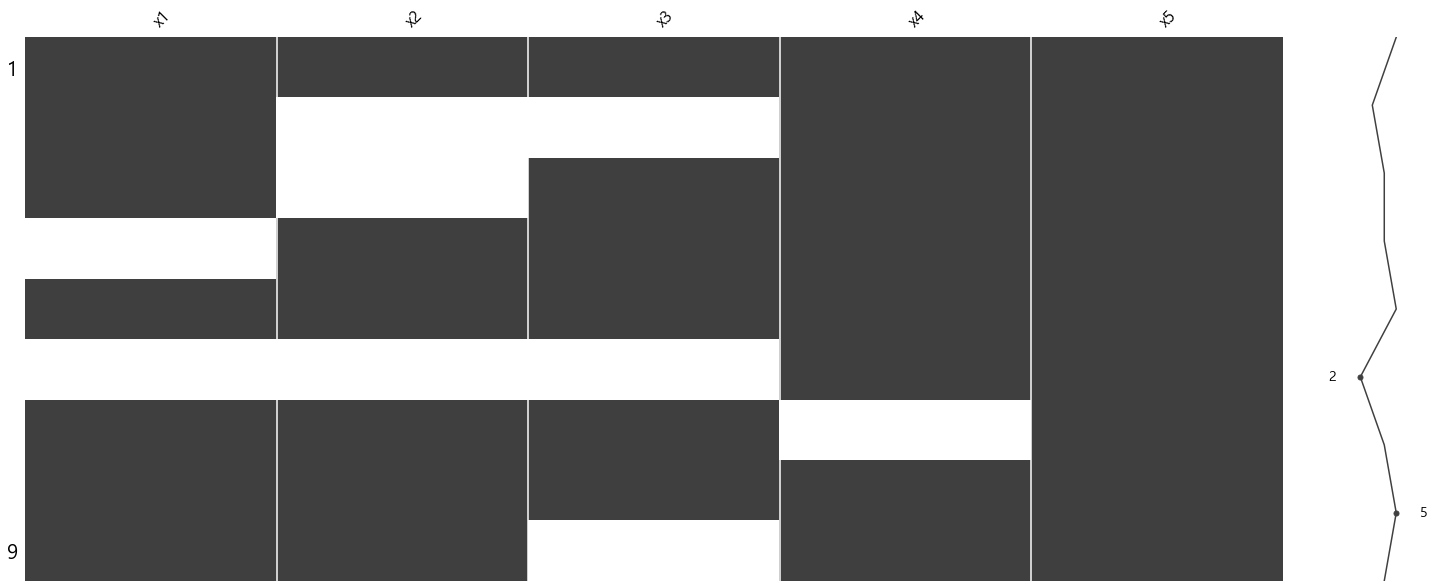

In [94]:
# df.isnull().sum()
msno.matrix(df)

<AxesSubplot:>

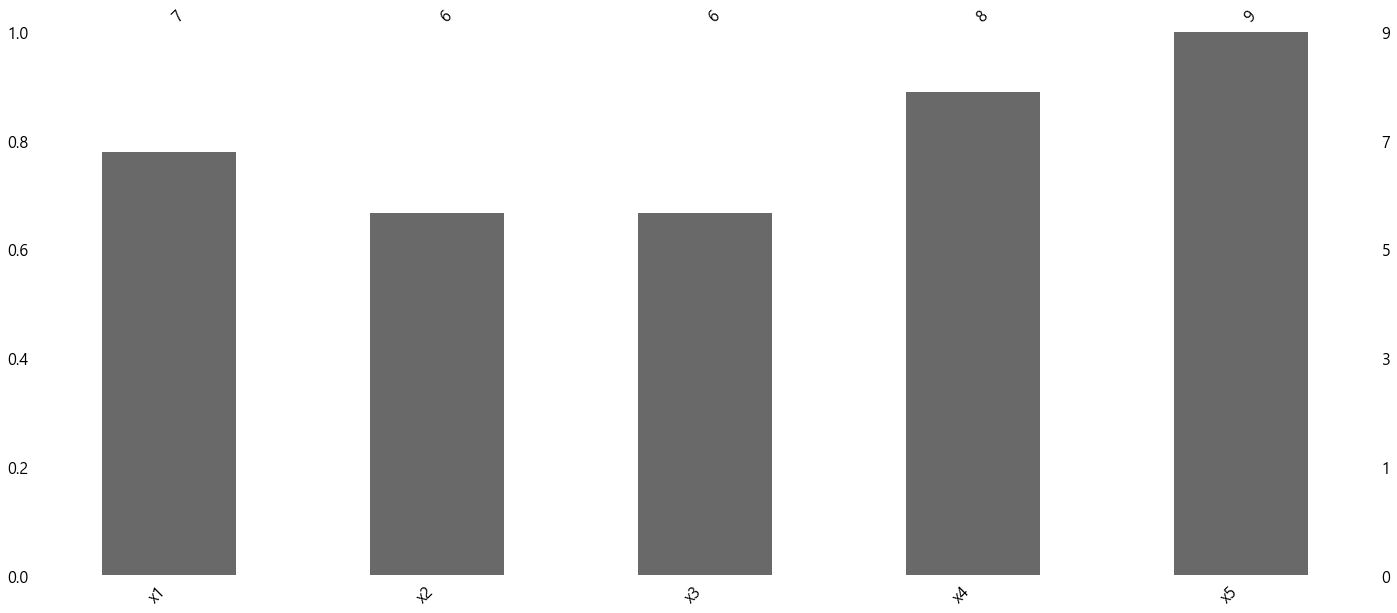

In [95]:
msno.bar(df)

In [109]:
titanic = sns.load_dataset('titanic')
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

<AxesSubplot:>

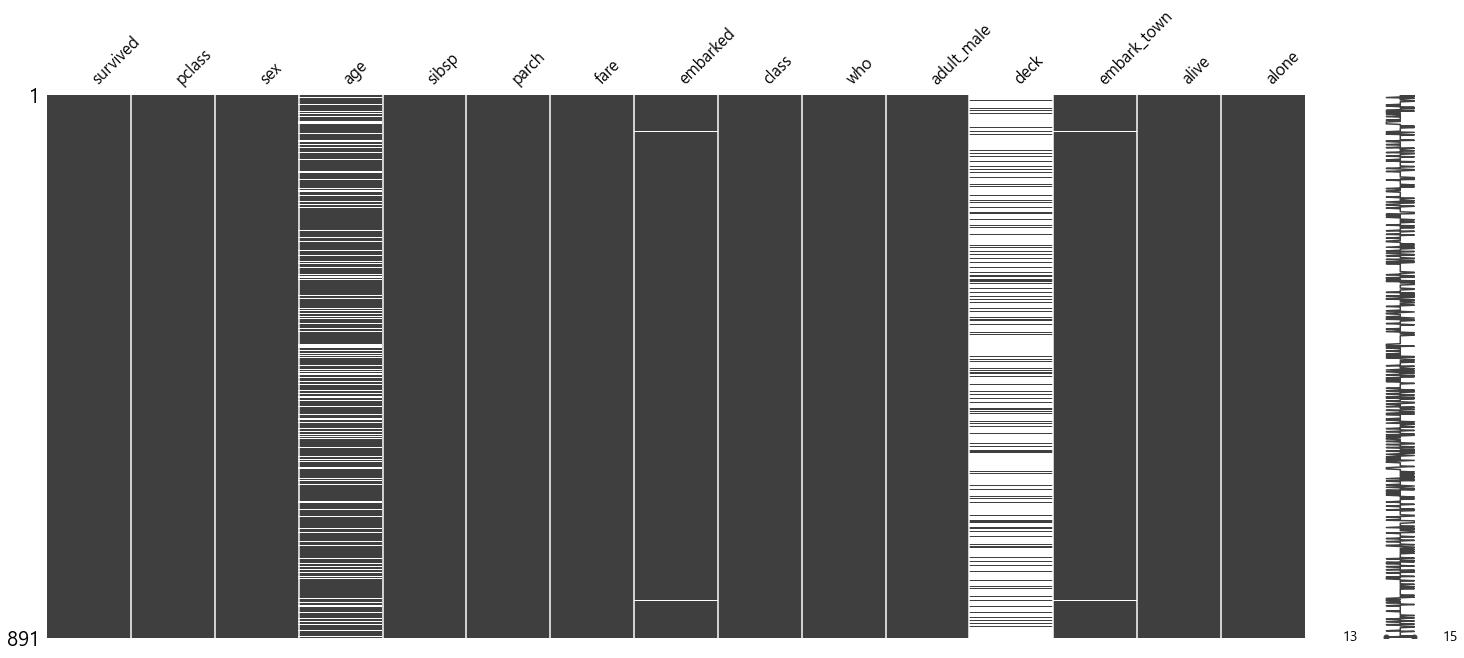

In [98]:
msno.matrix(titanic)

<AxesSubplot:>

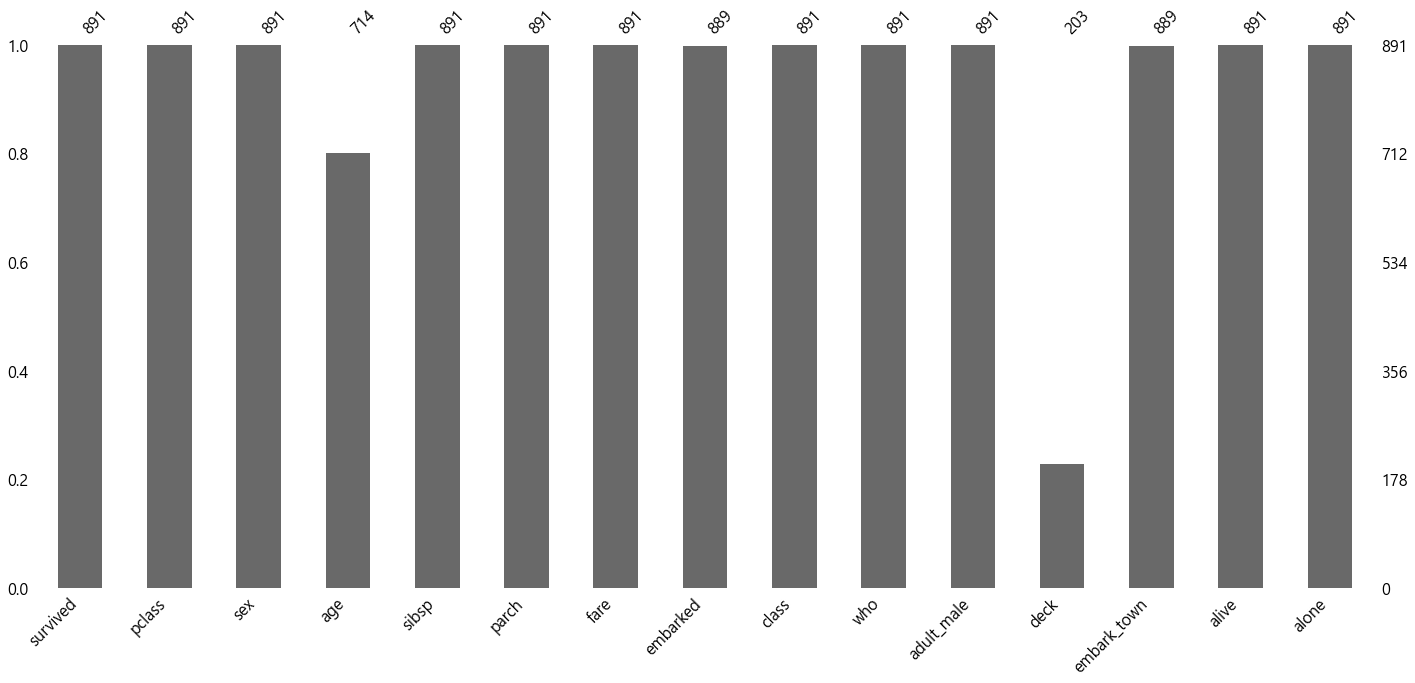

In [99]:
msno.bar(titanic)

In [103]:
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [107]:
print('결측값을 드롭하지않고 대체값(평균, 중앙, 최빈)으로 변경하고 싶다면 - ')
print('fit_transform()')
imputer = SimpleImputer(strategy = 'most_frequent')
df = pd.DataFrame(imputer.fit_transform(df) , 
                  columns = df.columns)
df

결측값을 드롭하지않고 대체값(평균, 중앙, 최빈)으로 변경하고 싶다면 - 
fit_transform()


,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,0.1,1.0,2019-01-02,B
2,3.0,0.1,3.0,2019-01-03,C
3,1.0,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,1.0,0.1,1.0,2019-01-06,C
6,7.0,0.7,7.0,2019-01-01,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,1.0,2019-01-09,C


In [112]:
print('age - 평균 , deck - G 대체한다면? - SimpleImputer')
titanic_age_imputer = SimpleImputer(strategy = 'mean')
titanic['age'] = titanic_age_imputer.fit_transform(titanic[['age']])

age - 평균 , deck - G 대체한다면? - SimpleImputer


<AxesSubplot:>

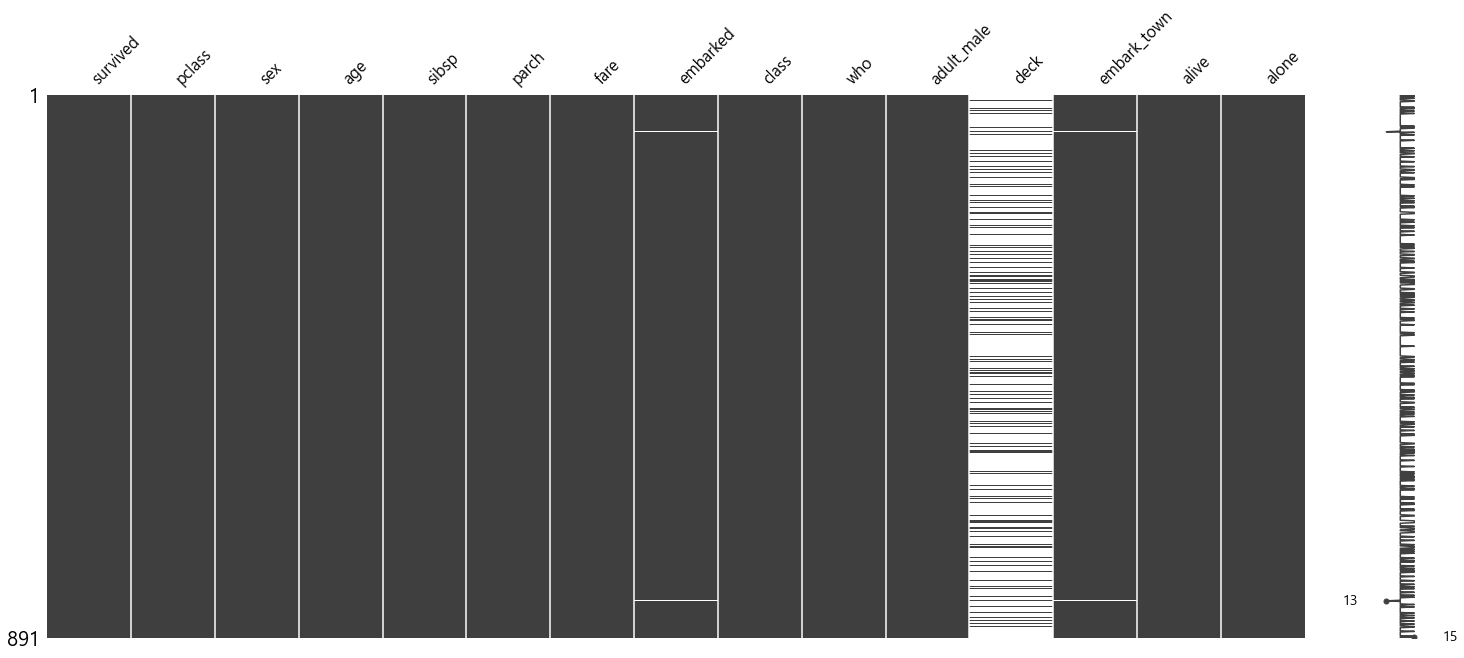

In [113]:
msno.matrix(titanic)

<AxesSubplot:>

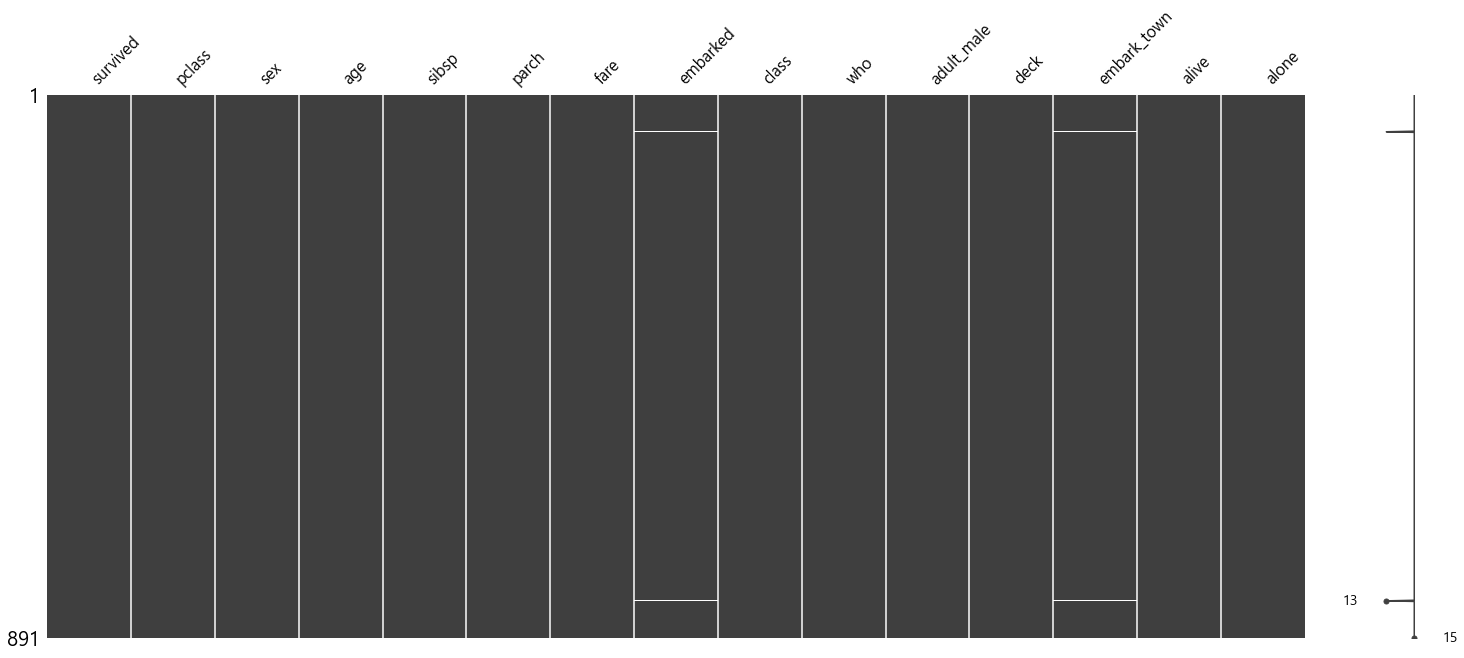

In [114]:
titanic['deck'] = titanic['deck'].fillna('G')
msno.matrix(titanic)

#### Feature Scaling

- 정규화(0과 1사이의 값으로 변환 - MinMaxScalar) (x - x최소값) / (x최대값 - x최소값) 만약 음수일 경우 1 대체됨, 
- 표준화(정규분포를 따르는 형식으로 평균이 0 분산 1 가우시안분포 변환 - StandardScalar)(x - x 평균값) / (x표준편차)

In [118]:
iris_frm = pd.DataFrame(data    = iris.data , 
                        columns = iris.feature_names)
print('mean - ')
print(iris_frm.mean())
print()
print('std - ')
print(iris_frm.std())
print()
print('var - ')
print(iris_frm.var())


mean - 
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

std - 
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

var - 
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [125]:
print('표준화 - ')
print()
s_scaler = StandardScaler()

# s_scaler.fit(iris_frm)
# s_iris   = s_scaler.transform(iris_frm)

s_iris   = s_scaler.fit_transform(iris_frm)
s_iris_frm = pd.DataFrame(data    = s_iris , 
                          columns = iris.feature_names)
s_iris_frm

표준화 - 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [126]:
print('정규화 - ')
print()
m_scaler = MinMaxScaler()

m_scaler.fit(iris_frm)
m_iris   = m_scaler.transform(iris_frm)

# s_iris   = s_scaler.fit_transform(iris_frm)

m_iris_frm = pd.DataFrame(data    = m_iris , 
                          columns = iris.feature_names)
m_iris_frm

정규화 - 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


- 스케일링 변환시 주의점!!! (중요)

In [129]:
print('예제를 통해서 문제점을 파악해보자 - ')
print()
print()


train_data = np.arange(0, 11).reshape(-1,1)
print('train - ')
print(train_data)
print()
test_data = np.arange(0, 6).reshape(-1,1)
print('test - ')
print(test_data)


예제를 통해서 문제점을 파악해보자 - 


train - 
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]

test - 
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [133]:
print('학습데이터의 정규화 - ')
print()
scaler = MinMaxScaler()
scaler.fit(train_data)

m_train_data = scaler.transform(train_data)
print('원본 데이터   - ' , train_data.reshape(-1))
print('정규화 데이터 - ' , m_train_data.reshape(-1))


학습데이터의 정규화 - 

원본 데이터   -  [ 0  1  2  3  4  5  6  7  8  9 10]
정규화 데이터 -  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [136]:
print('테스트데이터의 정규화 - ')

scaler.fit(test_data)
m_test_data = scaler.transform(test_data)
print('원본 데이터   - ' , test_data.reshape(-1))
print('정규화 데이터 - ' , m_test_data.reshape(-1))

print()
print('위 코드의 문제점은 테스트데이터의 스케일링 기준은 학습데이터의 스케일링 기준을 잡아야 한다 -')
print('왜냐하면 ? 학습기는 학습데이터를 기준으로 학습을 진행하기 때문에')

테스트데이터의 정규화 - 
원본 데이터   -  [0 1 2 3 4 5]
정규화 데이터 -  [0.  0.2 0.4 0.6 0.8 1. ]

위 코드의 문제점은 테스트데이터의 스케일링 기준은 학습데이터의 스케일링 기준을 잡아야 한다 -
왜냐하면 ? 학습기는 학습데이터를 기준으로 학습을 진행하기 때문에


In [138]:
print('학습데이터 기준의 테스트데이터 스케일링을 통한 문제점 해결!!! ')
print()
print()

scaler = MinMaxScaler()
scaler.fit(train_data)

m_train_data = scaler.transform(train_data)
print('원본 데이터   - ' , train_data.reshape(-1))
print('정규화 데이터 - ' , m_train_data.reshape(-1))
print()
print()
m_test_data = scaler.transform(test_data)
print('원본 데이터   - ' , test_data.reshape(-1))
print('정규화 데이터 - ' , m_test_data.reshape(-1))

학습데이터 기준의 테스트데이터 스케일링을 통한 문제점 해결!!! 


원본 데이터   -  [ 0  1  2  3  4  5  6  7  8  9 10]
정규화 데이터 -  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


원본 데이터   -  [0 1 2 3 4 5]
정규화 데이터 -  [0.  0.1 0.2 0.3 0.4 0.5]


- 스케일링 전, 후의 정확도 비교 [실습]
- https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv


In [142]:
sample_frm = pd.io.parsers.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv' , 
                                   header  = None , 
                                   usecols = [0, 2, 13])
sample_frm.columns = ['target' , 'x' , 'y']
sample_frm

,target,x,y
0,1,1.71,1065
1,1,1.78,1050
2,1,2.36,1185
3,1,1.95,1480
4,1,2.59,735
...,...,...,...
173,3,5.65,740
174,3,3.91,750
175,3,4.28,835
176,3,2.59,840
